# Challenge Mercado Libre.

### Armado de base para tablero



### 1. Librerías

In [135]:
import pandas as pd
import requests
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 2. Base WB usuarios con acceso por año

In [37]:
# Leo base de Usuarios con acceso a internet
df_wb = pd.read_csv('Bases Worldbanck/API_IT.NET.USER.ZS_DS2_en_csv_v2_169.csv', skiprows=4)
# Filtro argentina
df=df_wb[df_wb['Country Name']=='Argentina']
# Unpivot para convertir las columnas de años en una sola columna
df_acceso = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                    var_name="Año", 
                    value_name="% Usuarios con acceso a Internet")

df_acceso = df_acceso.dropna(subset=["% Usuarios con acceso a Internet"])
df_acceso=df_acceso.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code'])

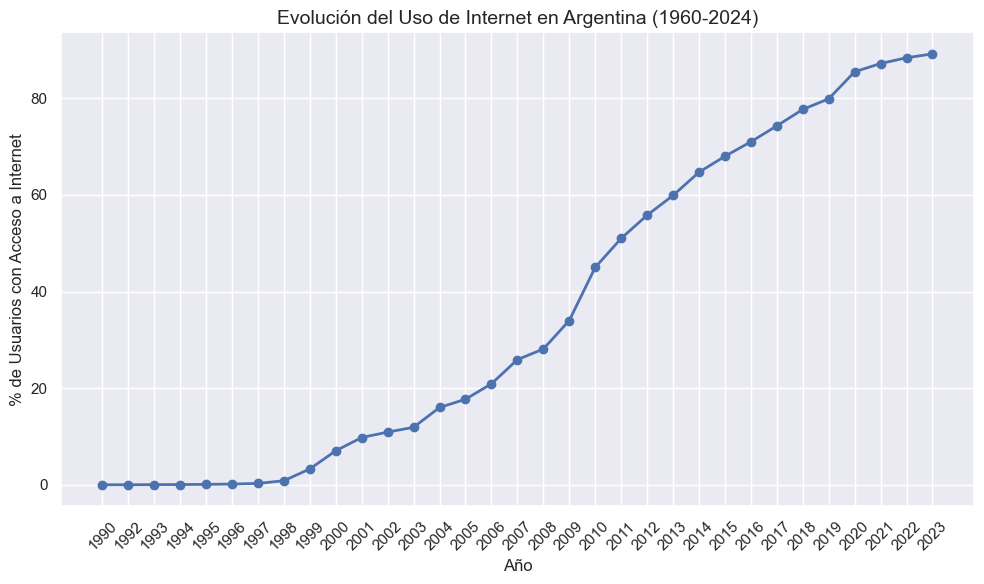

In [38]:
plt.figure(figsize=(10, 6)) 


plt.plot(df_melted['Año'], df_melted['% Usuarios con acceso a Internet'], marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Evolución del Uso de Internet en Argentina (1960-2024)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('% de Usuarios con Acceso a Internet', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()


### 3. Base Suscripciones a Banda Ancha

In [39]:
# Leo base de suscripciones a banda ancha cada 100 personas
df_sb = pd.read_csv('Bases Worldbanck/API_IT.NET.BBND.P2_DS2_en_csv_v2_241.csv', skiprows=4)
# Filtro argentina
df_sb=df_sb[df_sb['Country Name']=='Argentina']
# Unpivot para convertir las columnas de años en una sola columna
df_banda_ancha = df_sb.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                    var_name="Año", 
                    value_name="Suscripcion Banda Ancha Fija / 100 personas")

df_banda_ancha = df_banda_ancha.dropna(subset=["Suscripcion Banda Ancha Fija / 100 personas"])
df_banda_ancha = df_banda_ancha.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code'])

In [43]:
# Unir base de acceso a Internet y suscripciones de banda ancha
df_combined = pd.merge(df_acceso, df_banda_ancha, on=['Año'] , how='left')
df_combined


,Año,% Usuarios con acceso a Internet,Suscripcion Banda Ancha Fija / 100 personas
0,1990,0.00000,NaN
1,1992,0.00299,NaN
2,1993,0.02950,NaN
3,1994,0.04370,NaN
4,1995,0.08630,NaN
5,1996,0.14200,NaN
6,1997,0.28000,NaN
7,1998,0.83100,NaN
8,1999,3.28000,NaN
9,2000,7.04000,NaN


In [156]:
df_combined.to_csv('Bases_finales/Base_WB.csv',sep=';', decimal='.', index=False)

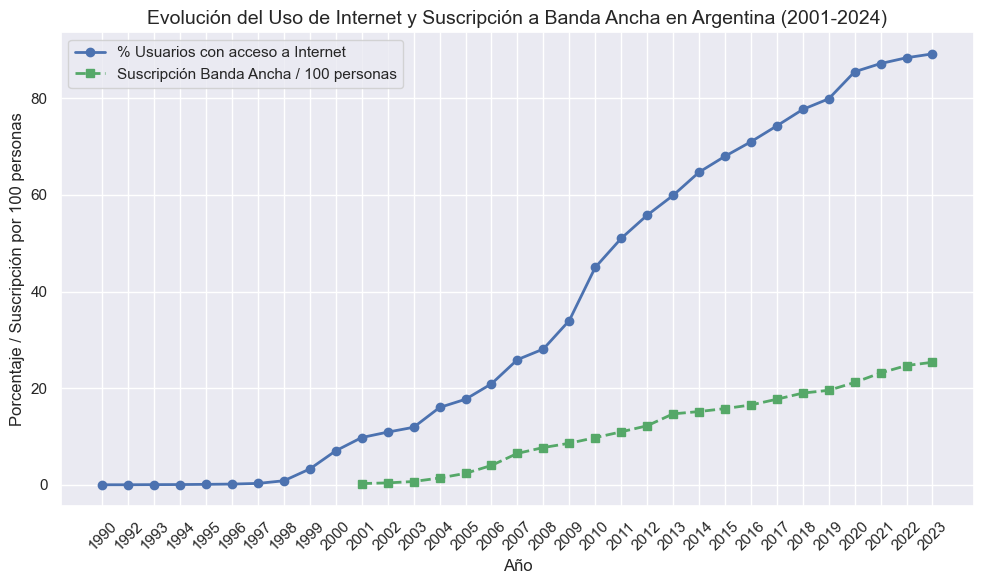

In [42]:
plt.figure(figsize=(10, 6))

# Graficar la evolución del acceso a Internet
plt.plot(df_combined['Año'], df_combined['% Usuarios con acceso a Internet'], marker='o', label='% Usuarios con acceso a Internet', color='b', linestyle='-', linewidth=2)

# Graficar las suscripciones de banda ancha
plt.plot(df_combined['Año'], df_combined['Suscripcion Banda Ancha Fija / 100 personas'], marker='s', label='Suscripción Banda Ancha / 100 personas', color='g', linestyle='--', linewidth=2)

# Títulos y etiquetas
plt.title('Evolución del Uso de Internet y Suscripción a Banda Ancha en Argentina (2001-2024)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje / Suscripción por 100 personas', fontsize=12)

# Mejorar la visualización de las etiquetas en el eje X
plt.xticks(rotation=45)

# Añadir una cuadrícula
plt.grid(True)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el gráfico para que no se corten las etiquetas
plt.show()

### 4. Base de Datos Enacom

In [188]:
df_tec=pd.read_excel('Bases Enacom/Internet Accesos Tecnologia Provincias.xlsx',skiprows=1)
df_tec=df_tec.groupby(['Año','Provincia']).agg('sum').reset_index()
df_tec=df_tec.drop(columns=['Trimestre','Total'])
df_tec['Pais']='Argentina'
df_tec.to_csv('Bases_finales/Base_tec.csv',sep=';', index=False)

In [189]:
df_tec.Provincia.unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [190]:
def normalize_provincia(provincia):
    # Convertir todo a mayúsculas para que no haya diferencias entre mayúsculas y minúsculas
    provincia = provincia.upper()
    
    # Lista de provincias que tienen variación entre mayúsculas/minúsculas
    provincias = {
        'BUENOS AIRES': 'Provincia de Buenos Aires',
        'CABA':'Provincia de Buenos Aires',
        'CAPITAL FEDERAL':'Provincia de Buenos Aires',
        'CATAMARCA': 'Catamarca',
        'CHACO': 'Chaco',
        'CHUBUT': 'Chubut',
        'CORRIENTES': 'Corrientes',
        'CORDOBA': 'Córdoba',
        'CÓRDOBA' : 'Córdoba',
        'ENTRE RIOS': 'Entre Ríos',
        'ENTRE RÍOS': 'Entre Ríos',
        'FORMOSA': 'Formosa',
        'JUJUY': 'Jujuy',
        'LA PAMPA': 'La Pampa',
        'LA RIOJA': 'La Rioja',
        'MENDOZA': 'Mendoza',
        'MISIONES': 'Misiones',
        'NEUQUEN': 'Neuquén',
        'NEUQUÉN': 'Neuquén',
        'RIO NEGRO': 'Río Negro',
        'RÍO NEGRO': 'Río Negro',
        'SALTA': 'Salta',
        'SAN JUAN': 'San Juan',
        'SAN LUIS': 'San Luis',
        'SANTA CRUZ': 'Santa Cruz',
        'SANTA FE': 'Santa Fe',
        'SANTIAGO DEL ESTERO': 'Santiago Del Estero',
        'TIERRA DEL FUEGO': 'Tierra Del Fuego',
        'TUCUMAN': 'Tucumán',
        'TUCUMÁN': 'Tucumán'
    }
    
    # Reemplazar los nombres según la lista
    return provincias.get(provincia, provincia)


In [191]:
df_vel=pd.read_excel('Bases Enacom/Internet Accesos Velocidad Provincias.xlsx',skiprows=1)
# Aplicar la normalización a la columna 'Provincia'
df_vel['Provincia'] = df_vel['Provincia'].apply(normalize_provincia)
df_vel=df_vel.groupby(['Año','Provincia']).agg({'Velocidad':'mean','Accesos':'mean'}).reset_index()
df_vel.columns=['Año','Provincia','Promedio Velocidad','Promedio Accesos']
df_vel['Pais']='Argentina'
df_vel.to_csv('Bases_finales/Base_vel.csv',sep=';', decimal='.',index=False)
df_vel


,Año,Provincia,Promedio Velocidad,Promedio Accesos,Pais
0,2017,Catamarca,58.166667,2463.166667,Argentina
1,2017,Chaco,119.869565,4194.391304,Argentina
2,2017,Chubut,79.312500,5839.500000,Argentina
3,2017,Corrientes,130.000000,4465.285714,Argentina
4,2017,Córdoba,115.960000,28024.440000,Argentina
...,...,...,...,...,...
179,2024,Santa Cruz,84.202128,2638.595745,Argentina
180,2024,Santa Fe,230.518519,17190.246914,Argentina
181,2024,Santiago Del Estero,133.823529,4456.294118,Argentina
182,2024,Tierra Del Fuego,134.000000,1926.138298,Argentina


In [192]:
df_vel.Provincia.unique()

array(['Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Córdoba',
       'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Provincia de Buenos Aires',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

### 5. Bases Indec

In [108]:
pd.set_option('display.max_columns', None)

In [193]:
usu=pd.read_csv('Bases Indec/enut2021_base.txt',sep='|')
print(usu.columns.tolist())

['ID', 'WHOG', 'WPER', 'REGION', 'N_MIEMBRO', 'BHCV01', 'BHCV02', 'BHCV03', 'BHCV04', 'BHCV05', 'BHCV06', 'BHCV07', 'BHCV08', 'BHCV09', 'BHCV10', 'BHCV11', 'BHHO01', 'BHHO02', 'BHHO03', 'EDAD_SEL', 'GRUPO_EDAD_SEL', 'BHCH04_SEL', 'SEXO_SEL', 'BHCH06_SEL', 'BHCH07_SEL', 'BHCH08_SEL', 'BHCH09_SEL', 'BHCH10_01_SEL', 'BHCH10_02_SEL', 'BHCH10_99_SEL', 'BHCH11_SEL', 'BHCH12_SEL', 'BHCH13_SEL', 'NIVEL_EDUCATIVO_SEL', 'NIVEL_EDUCATIVO_AGRUPADO', 'BHCH14_01_SEL', 'BHCH14_02_SEL', 'BHCH14_03_SEL', 'BHCH14_04_SEL', 'BHCH14_05_SEL', 'BHCH14_06_SEL', 'BHCH14_07_SEL', 'BHCH14_99_SEL', 'BHCH15_SEL', 'CANT_MIEMBROS_HOGAR', 'CANT_PERSONASHASTA13', 'CANT_PERSONAS14A64', 'CANT_PERSONAS65YMAS', 'CANT_DEMANDANTES_TOTAL', 'CANT_NODEMANDANTES_TOTAL', 'CANT_DEMANDANTES_14A64', 'CANT_DEMANDANTES_65YMAS', 'CANT_AYUDA_TOTAL', 'BHDC_SEL', 'BHDC01_01_SEL', 'BHDC01_02_SEL', 'BHDC01_03_SEL', 'BHDC01_04_SEL', 'BHDC01_05_SEL', 'BHDC01_06_SEL', 'BHDC01_07_SEL', 'BHDC01_08_SEL', 'BHDC02_01_SEL', 'BHDC02_02_SEL', 'BHDC02

In [194]:
usu.REGION.value_counts()

REGION
2    4625
3    2501
1    2168
6    2128
5    1636
4    1292
Name: count, dtype: int64

In [195]:
df=usu[['REGION','EDAD_SEL','TCS_ACT_USARCOMPUTADORA','TCS_ACT_USARCELULAR','TCS_ACT_TRABAJOOCUPACION','TSS_ACT_TRABAJOOCUPACION']]

In [196]:
df.EDAD_SEL.quantile([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])


0.01    14.0
0.05    18.0
0.10    21.0
0.25    30.0
0.50    43.0
0.75    60.0
0.90    71.0
0.95    77.0
0.99    86.0
Name: EDAD_SEL, dtype: float64

In [197]:
# Definir los cuantiles
quantiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]

# Calcular los percentiles para cada columna relevante
percentiles = df[['EDAD_SEL', 'TCS_ACT_USARCOMPUTADORA', 'TCS_ACT_USARCELULAR', 'TCS_ACT_TRABAJOOCUPACION', 'TSS_ACT_TRABAJOOCUPACION']].quantile(quantiles)

# Crear una función para asignar el percentil correspondiente
def assign_percentile(column, value):
    for i in range(len(quantiles) - 1):
        if value <= column.iloc[i + 1]:
            return quantiles[i + 1]  # Devuelve el percentil correspondiente
    return quantiles[-1]  # Si el valor es mayor que todos, asignar el último percentil

# Aplicar la función para crear nuevas columnas de percentiles
for col in ['EDAD_SEL', 'TCS_ACT_USARCOMPUTADORA', 'TCS_ACT_USARCELULAR', 'TCS_ACT_TRABAJOOCUPACION', 'TSS_ACT_TRABAJOOCUPACION']:
    df[f'{col}_percentil'] = df[col].apply(lambda x: assign_percentile(percentiles[col], x))


C:\Users\NaranjaX\AppData\Local\Temp\ipykernel_16436\577357837.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_percentil'] = df[col].apply(lambda x: assign_percentile(percentiles[col], x))
C:\Users\NaranjaX\AppData\Local\Temp\ipykernel_16436\577357837.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_percentil'] = df[col].apply(lambda x: assign_percentile(percentiles[col], x))
C:\Users\NaranjaX\AppData\Local\Temp\ipykernel_16436\577357837.py:16: SettingWithCopyWarning: 
A value

In [198]:
df.EDAD_SEL_percentil.value_counts(normalize=True)

EDAD_SEL_percentil
0.75    0.245366
0.50    0.240627
0.25    0.168641
0.90    0.143554
0.05    0.060348
0.95    0.052822
0.99    0.045993
0.10    0.042648
Name: proportion, dtype: float64

In [207]:
region_mapping = {
    1: 'Gran Buenos Aires',
    2: 'Cuyo',
    3: 'Noreste',
    4: 'Noroeste',
    5: 'Pampeana',
    6: 'Patagonia'
}
df['REGION_NAME'] = df['REGION'].map(region_mapping)
df

C:\Users\NaranjaX\AppData\Local\Temp\ipykernel_16436\414683009.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REGION_NAME'] = df['REGION'].map(region_mapping)


,REGION,EDAD_SEL,TCS_ACT_USARCOMPUTADORA,TCS_ACT_USARCELULAR,TCS_ACT_TRABAJOOCUPACION,TSS_ACT_TRABAJOOCUPACION,EDAD_SEL_percentil,TCS_ACT_USARCOMPUTADORA_percentil,TCS_ACT_USARCELULAR_percentil,TCS_ACT_TRABAJOOCUPACION_percentil,TSS_ACT_TRABAJOOCUPACION_percentil,REGION_NAME
0,1,42,0,0,450,450.0,0.50,0.05,0.05,0.90,0.90,Gran Buenos Aires
1,1,35,0,40,410,410.0,0.50,0.05,0.75,0.75,0.90,Gran Buenos Aires
2,1,26,0,0,0,0.0,0.25,0.05,0.05,0.05,0.05,Gran Buenos Aires
3,1,43,0,10,370,370.0,0.50,0.05,0.75,0.75,0.75,Gran Buenos Aires
4,1,17,40,80,0,0.0,0.05,0.95,0.90,0.05,0.05,Gran Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...
14345,6,57,0,120,0,0.0,0.75,0.05,0.90,0.05,0.05,Patagonia
14346,6,64,0,0,0,0.0,0.90,0.05,0.05,0.05,0.05,Patagonia
14347,6,35,0,0,0,0.0,0.50,0.05,0.05,0.05,0.05,Patagonia
14348,6,64,0,0,0,0.0,0.90,0.05,0.05,0.05,0.05,Patagonia


In [209]:
df.to_csv('Bases_finales/Uso_2021_perentiles.csv',sep=';',index=False)